In [1]:
# Importing Library's
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


#### Business Problem
##### A cloth manufacturing company is interested to know about the segment or attributes causes high sale.

### Data Collection And Description

In [2]:
df= pd.read_csv('Company_Data.csv')

In [3]:
df1  = df.copy()

In [7]:
df1.sample(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
101,6.20,128,93,0,89,118,Medium,34,18,Yes,No
184,9.95,132,33,7,35,97,Medium,60,11,No,Yes
92,4.53,114,113,0,97,125,Medium,29,12,Yes,No
248,5.36,111,52,0,12,101,Medium,61,11,Yes,Yes
376,16.27,141,60,19,319,92,Good,44,11,Yes,Yes


In [9]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


Outlier Check

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


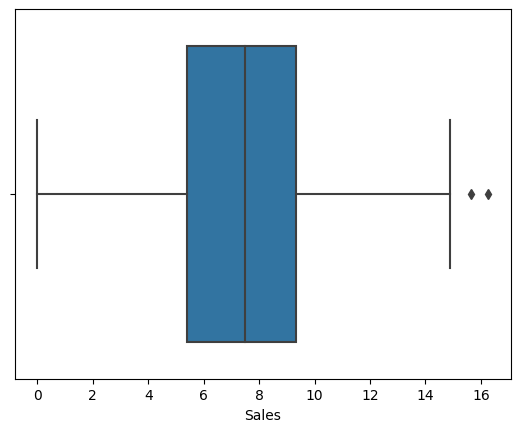

In [12]:
ax = sns.boxplot(df1['Sales'])

The Data has 2 outlier instances

In [14]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


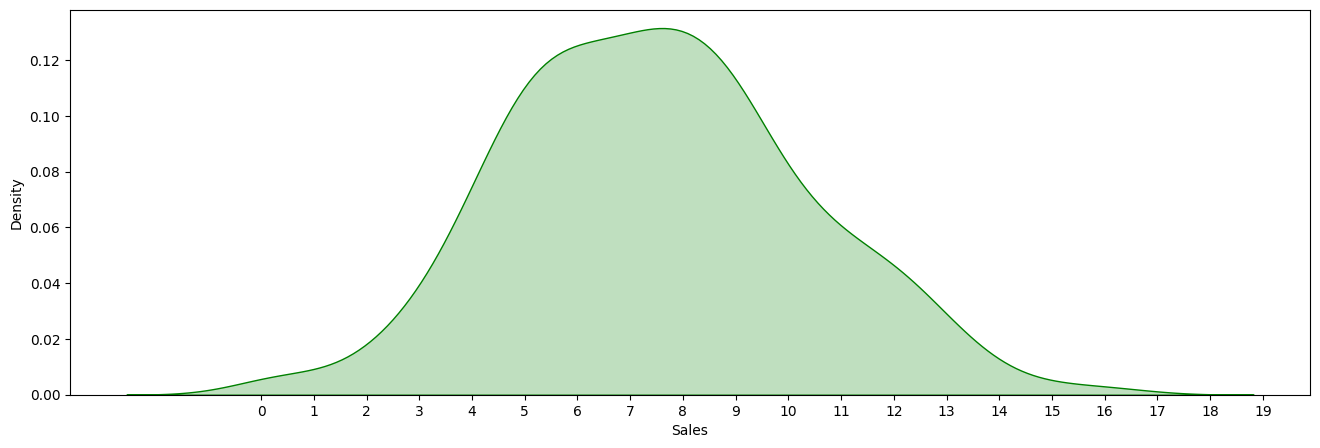

In [15]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Sales'].skew()))
print("Kurtosis: {}".format(df1['Sales'].kurtosis()))
ax = sns.kdeplot(df1['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

##### The Data is Skwed on the right
##### The Data has negative Kurtosis

In [16]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()

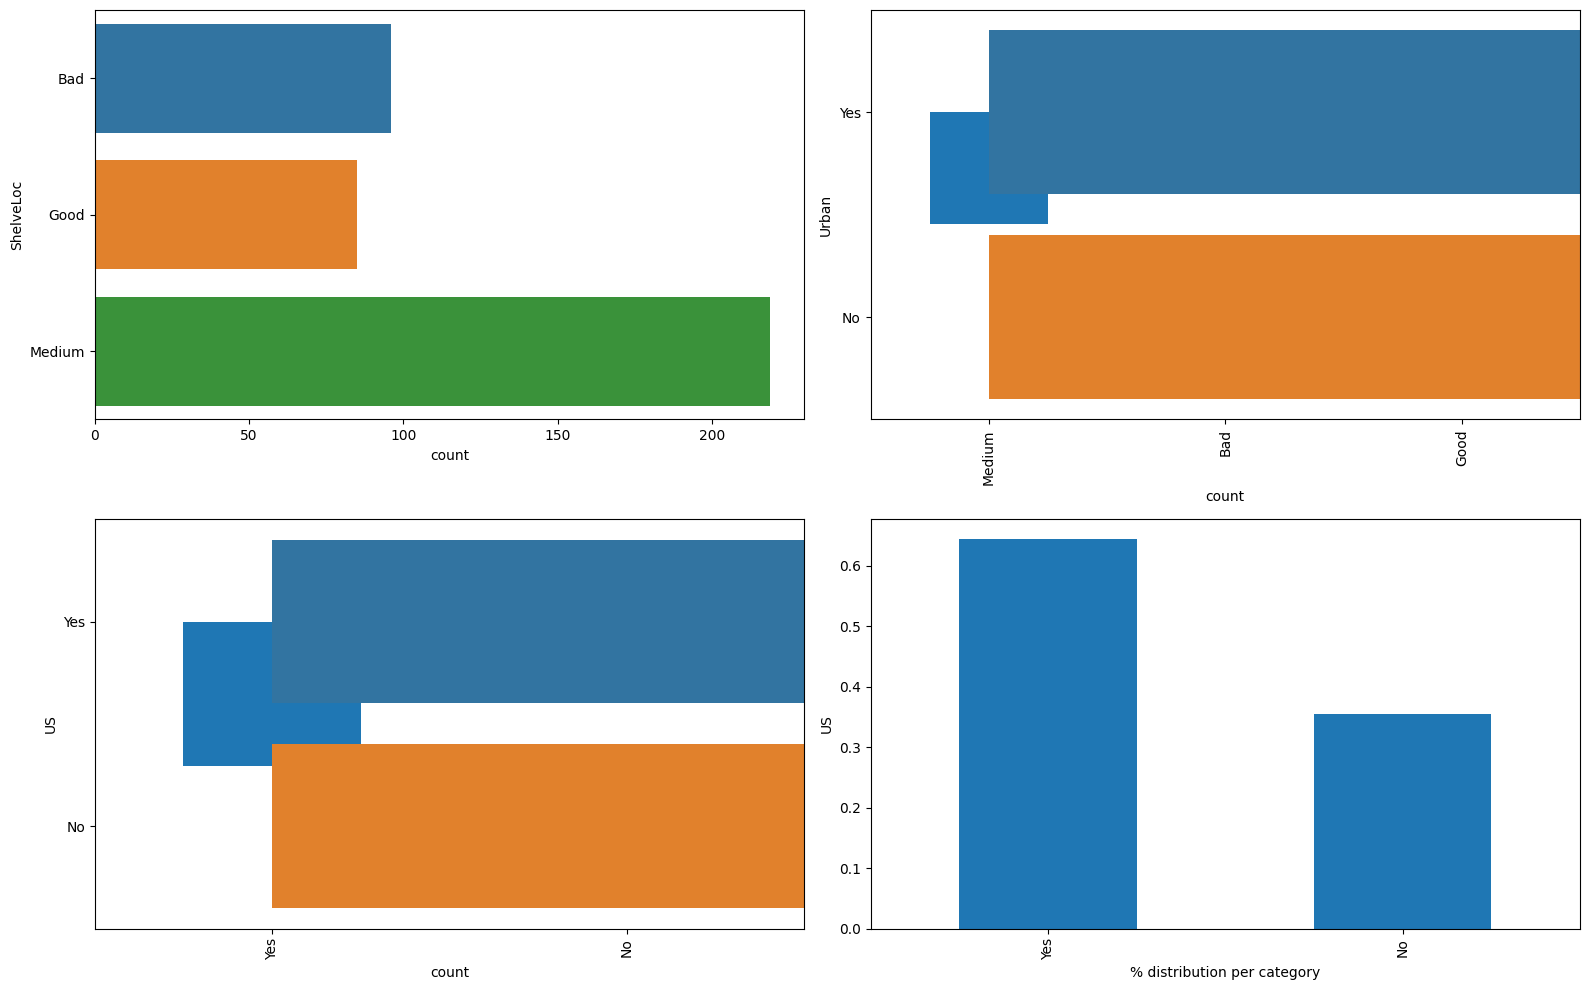

In [17]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

In [18]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

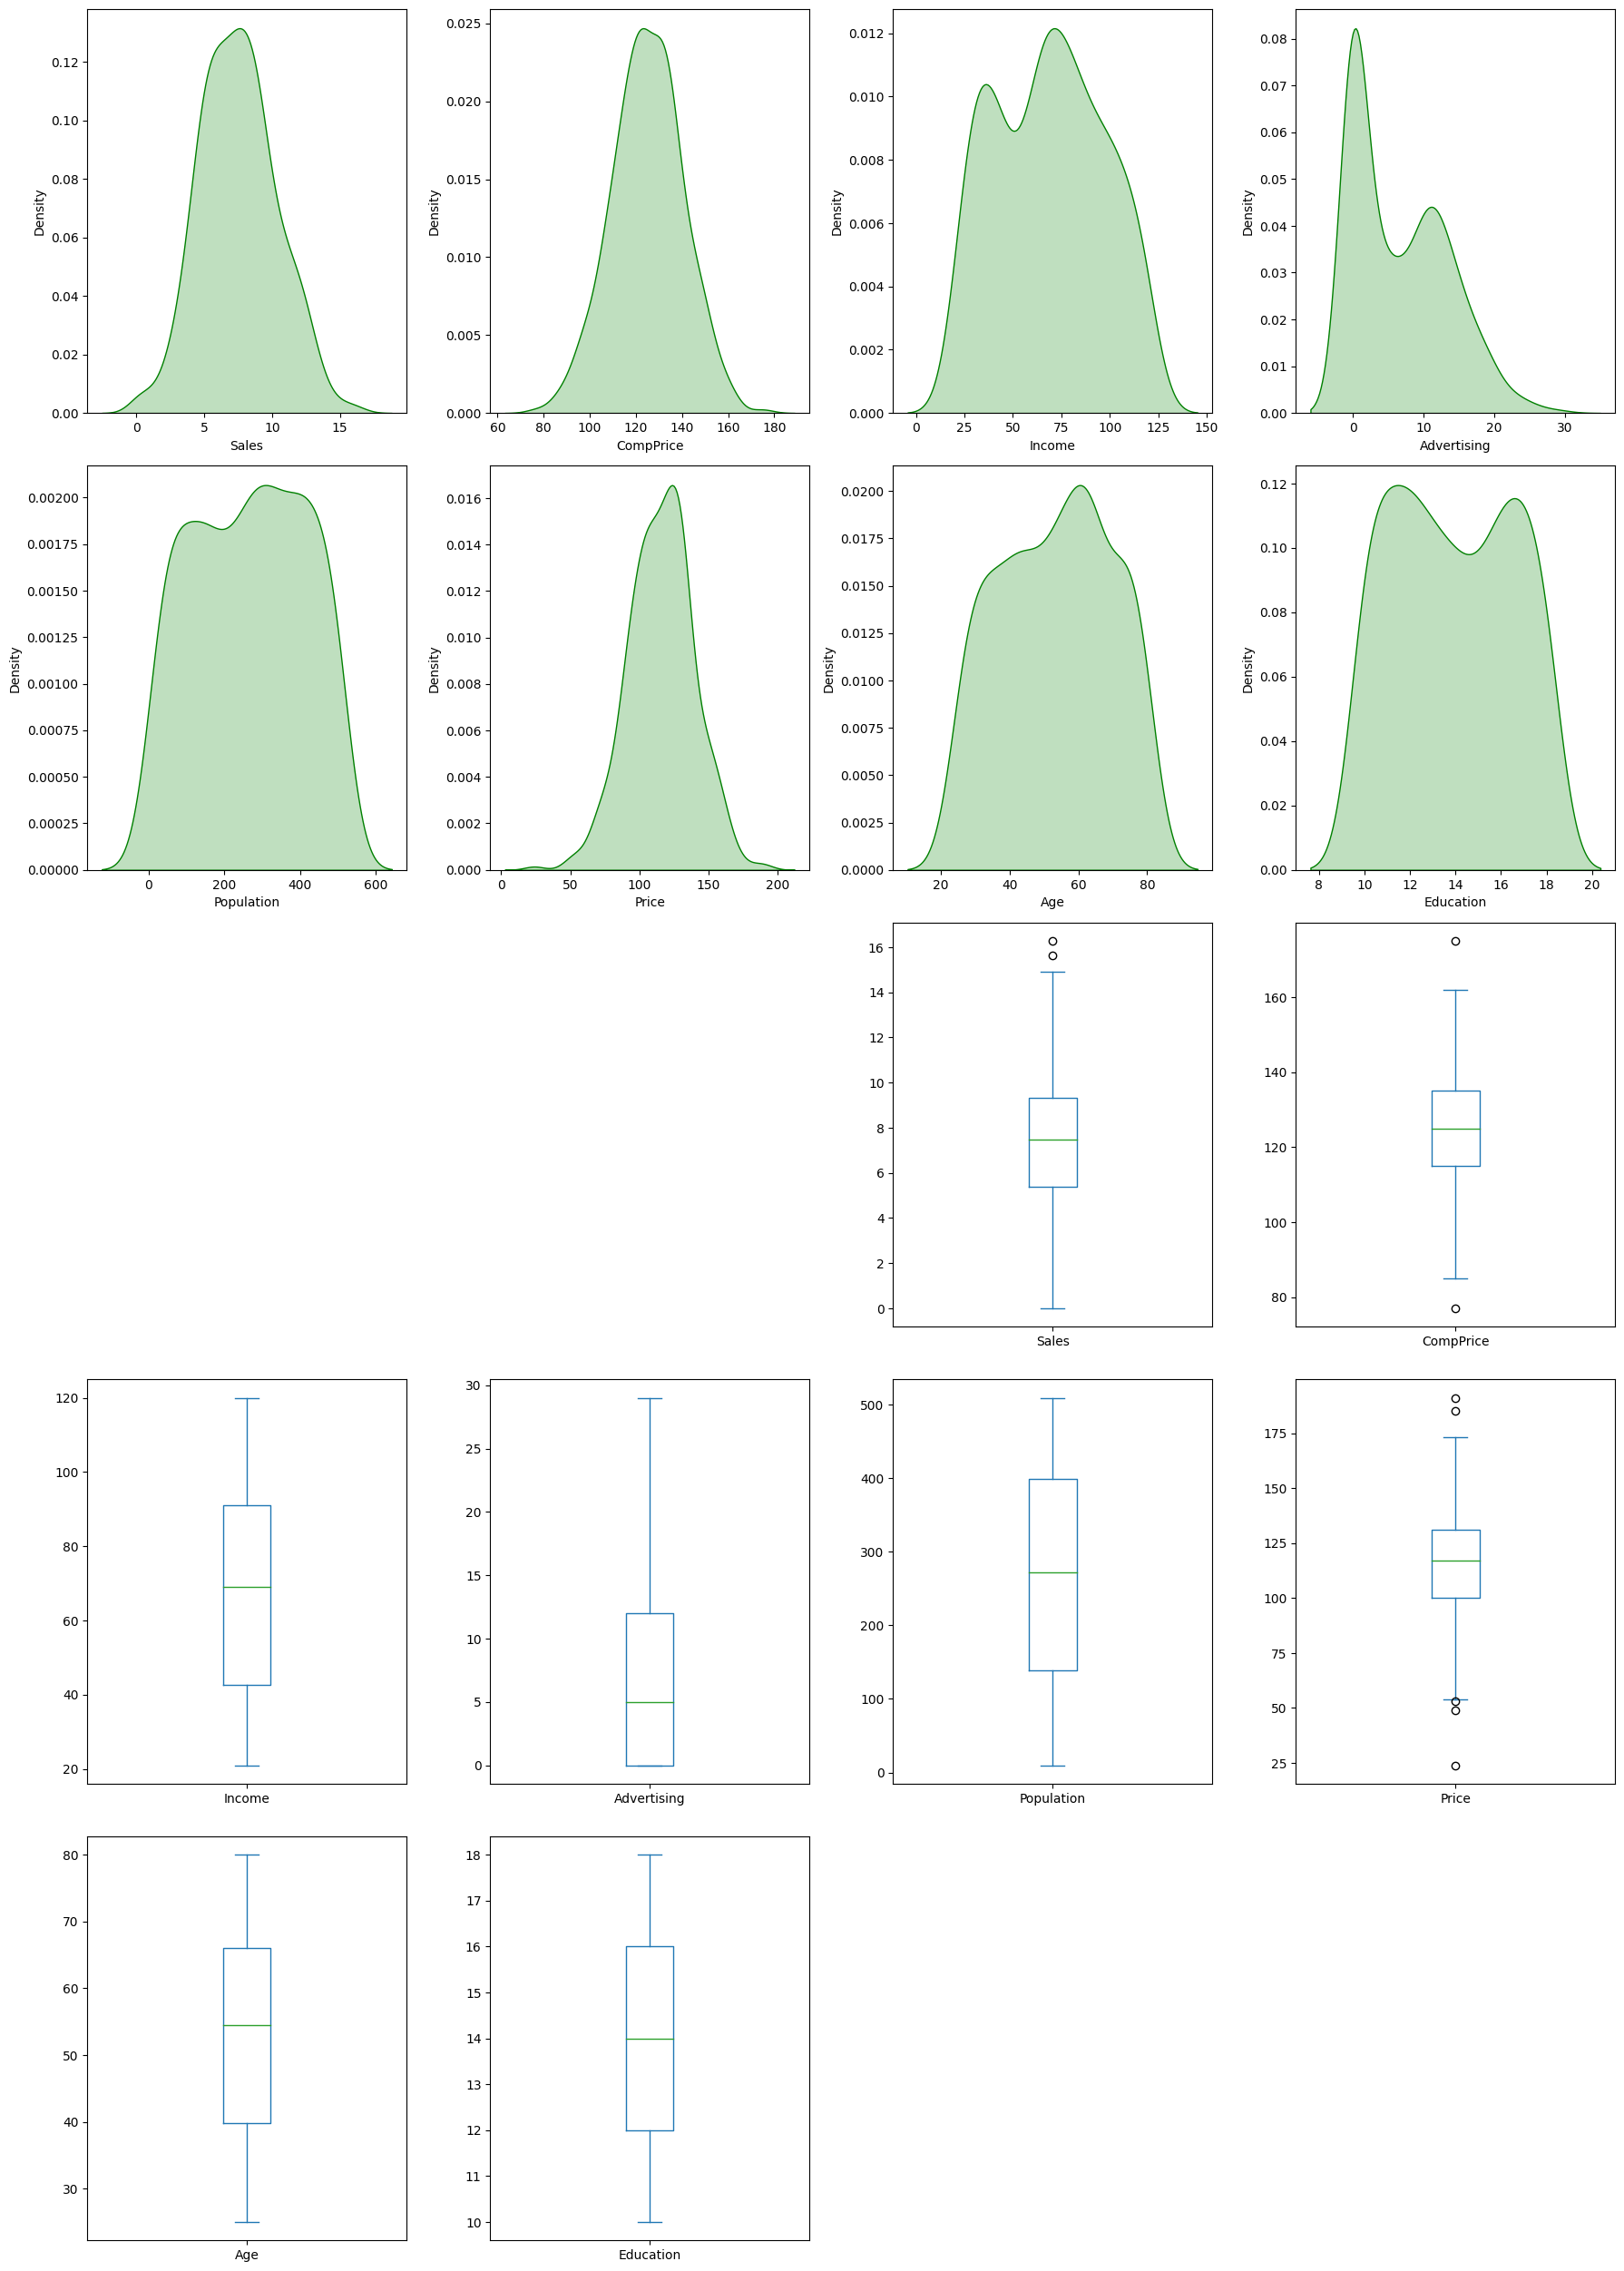

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [19]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [20]:
corr = df1.corr()

In [21]:
df1 = pd.get_dummies(df1, columns = ['ShelveLoc','Urban','US'])


<AxesSubplot: >

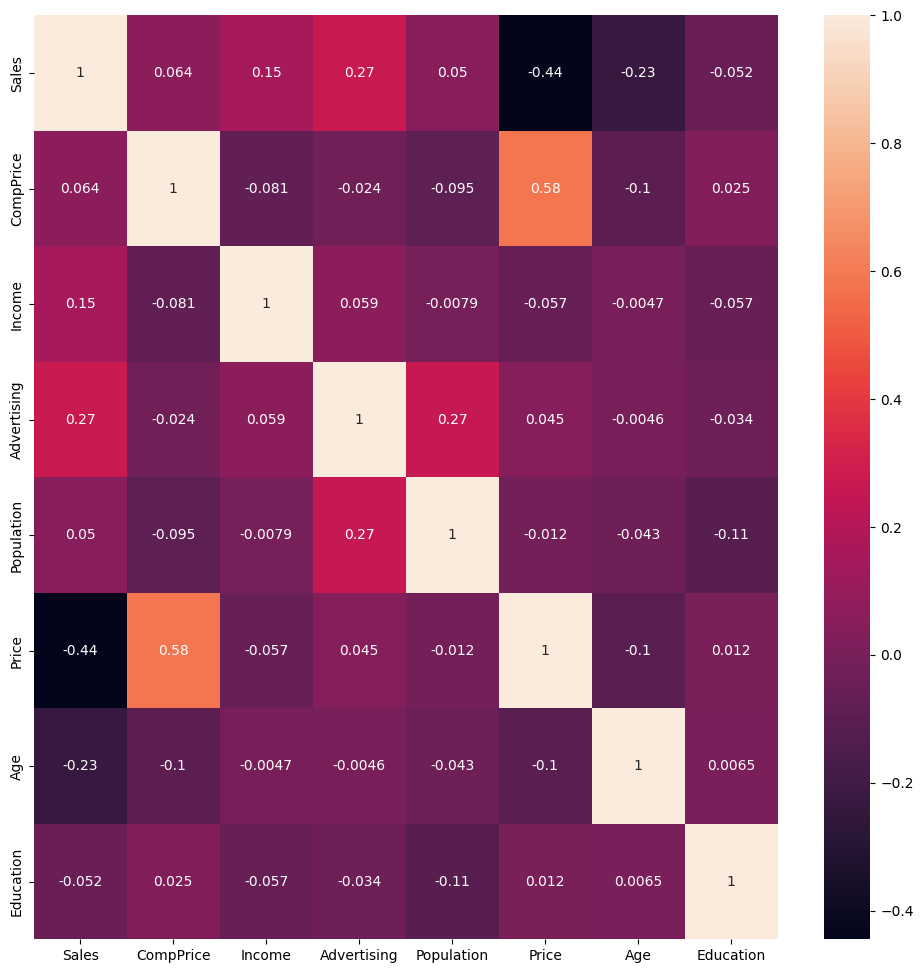

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True)

## Random Forest Model
Since the target variable is continious, we create a class of the value based on the mean
<= 7.49 == "Small" and > 7.49 == "large"

In [23]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)

In [24]:
X = df1.iloc[:,0:14]
y = df1.iloc[:,14]

In [34]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)


In [35]:
y_train.value_counts()

large    150
small    150
Name: sales, dtype: int64

In [36]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.8166666666666667

In [37]:
pred_train = model.predict(x_train)

In [39]:
accuracy_score(y_train,pred_train)

1.0

In [40]:
confusion_matrix(y_train,pred_train)

array([[150,   0],
       [  0, 150]], dtype=int64)

In [41]:
pred_test = model.predict(x_test)

In [42]:
accuracy_score(y_test,pred_test)

0.75

In [43]:
confusion_matrix(y_test,pred_test)

array([[38, 11],
       [14, 37]], dtype=int64)

In [44]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [45]:
df_t

,Actual,Predicted
388,large,large
354,small,small
340,large,large
298,large,large
85,large,small
...,...,...
236,large,large
179,large,small
5,large,large
367,large,large


## Conclusion
Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 75%

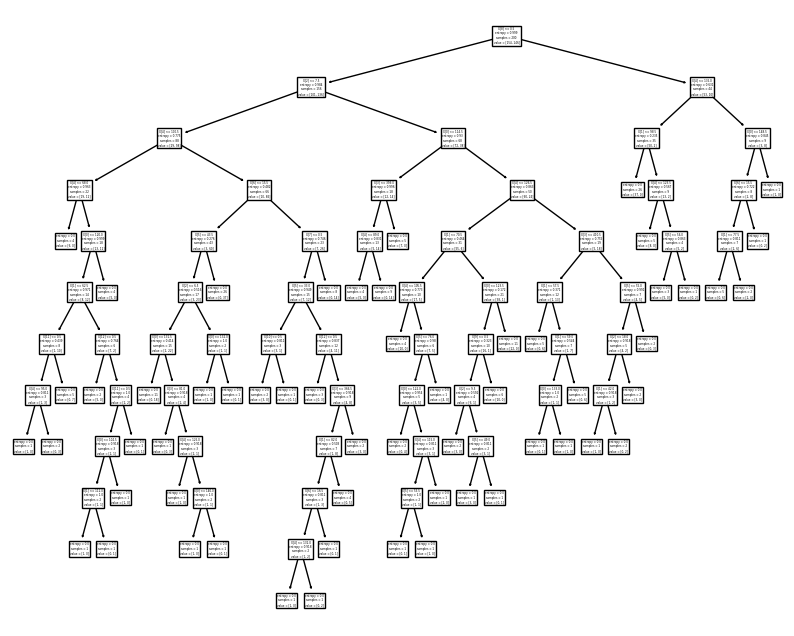

In [50]:
from sklearn.tree import plot_tree
tree_idx = 1 
fig, ax = plt.subplots(figsize=(10, 8)) 
plot_tree(model.estimators_[tree_idx], ax=ax)
plt.show()  

In [51]:
model.feature_importances_

array([0.1140239 , 0.10335075, 0.10441896, 0.09986448, 0.21510016,
       0.11119125, 0.05655707, 0.04324284, 0.07917753, 0.0238511 ,
       0.01159391, 0.01145063, 0.01372283, 0.0124546 ])

In [52]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [54]:
fi

,feature,importance
4,Price,0.215100
0,CompPrice,0.114024
5,Age,0.111191
2,Advertising,0.104419
1,Income,0.103351
3,Population,0.099864
8,ShelveLoc_Good,0.079178
6,Education,0.056557
7,ShelveLoc_Bad,0.043243
9,ShelveLoc_Medium,0.023851


As seen in the above table price is most important feature

## 2 nd Business Problem
##### Use Random Forest to prepare a model on fraud data

## Data Collection and Description

In [55]:
df= pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [56]:
df1 = df.copy()

In [57]:
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [58]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [59]:
df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [60]:
df1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

Outlier Check

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


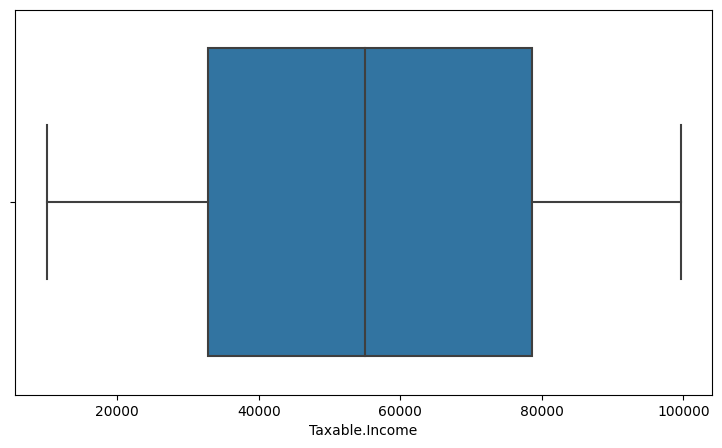

In [61]:
ax = sns.boxplot(df['Taxable.Income'])

There are no outliers in the data

In [62]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


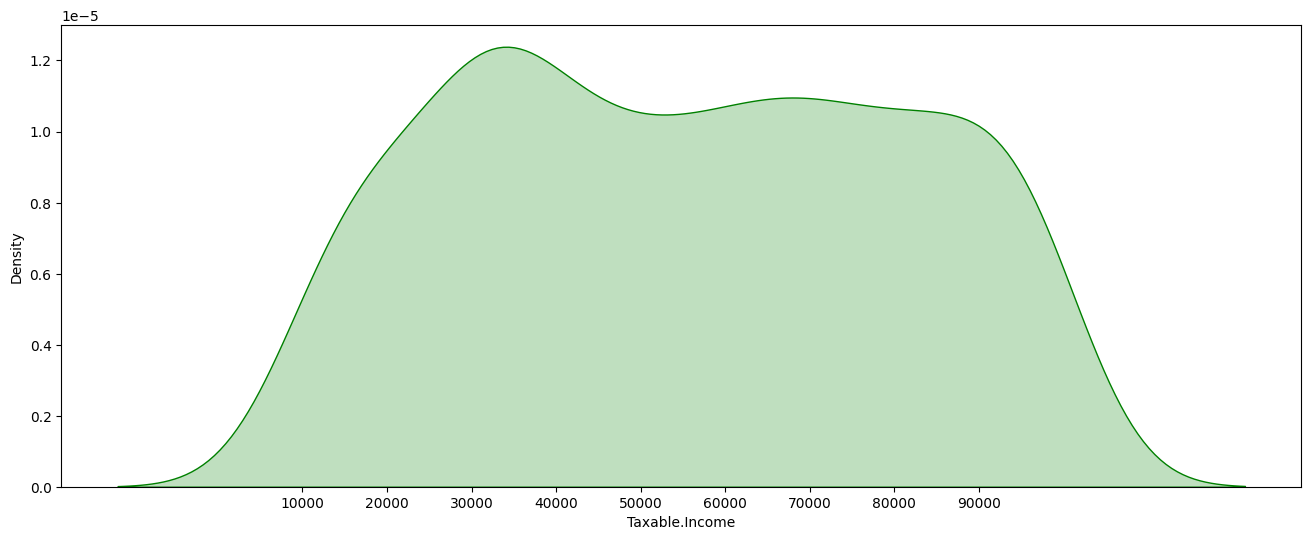

In [63]:
plt.figure(figsize=(16,6))
print("Skew: {}".format(df1['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df1['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df1['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

#### The data is Skwed on the right
#### The data has negative Kurtosis


In [64]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()

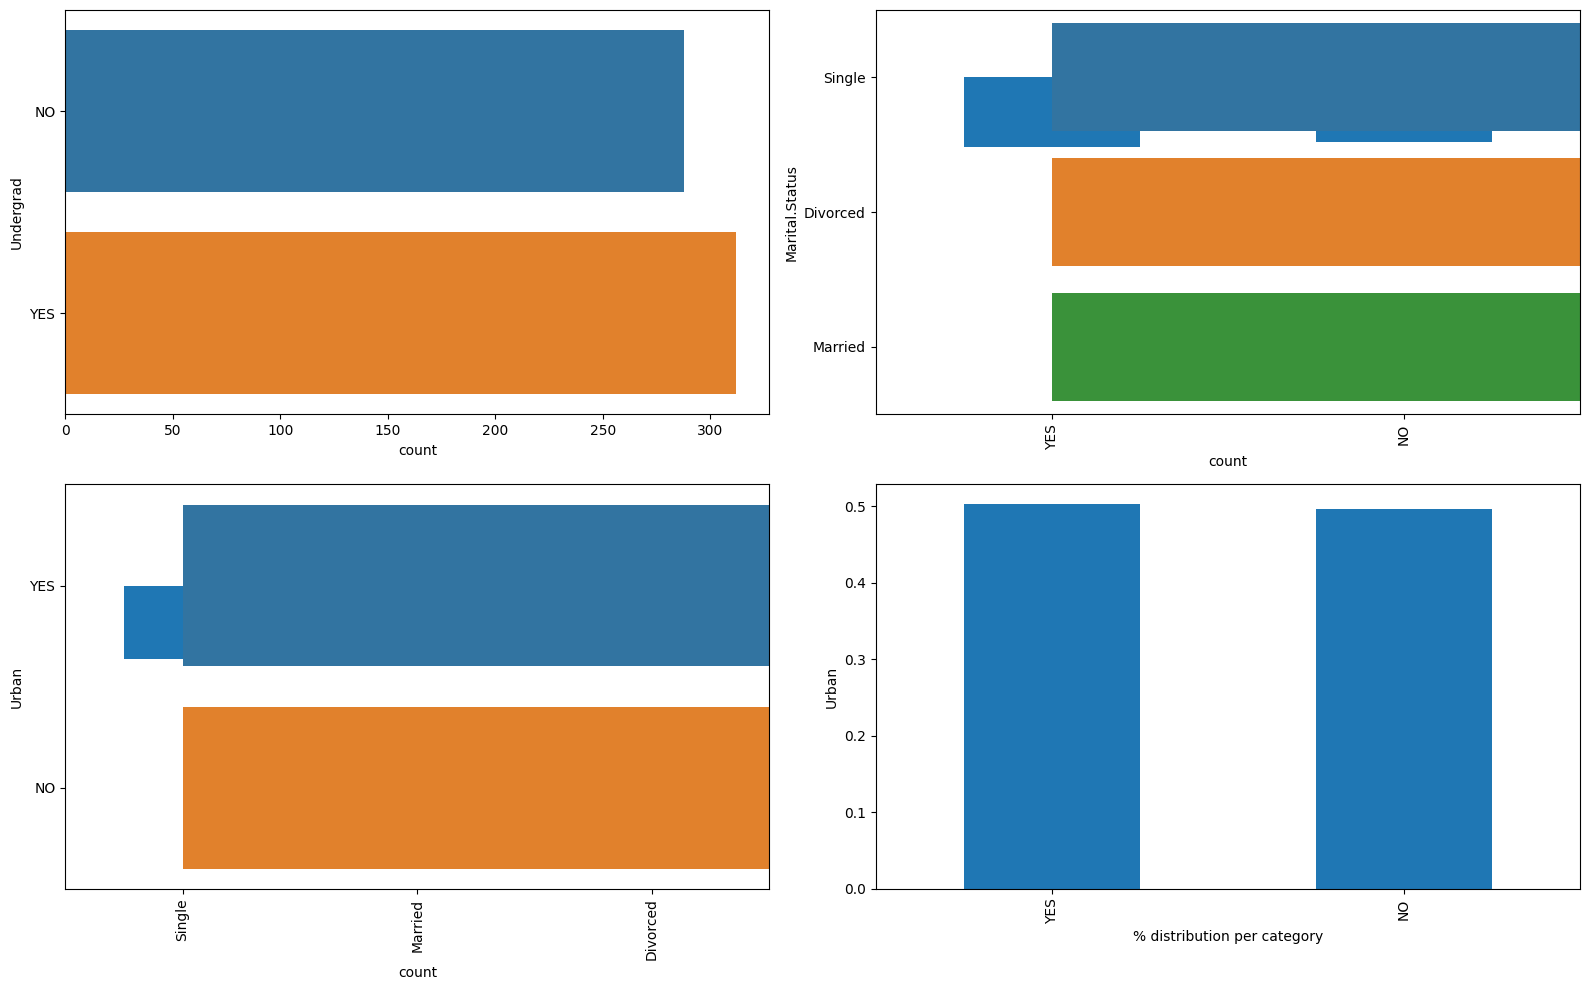

In [65]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show() 

In [66]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

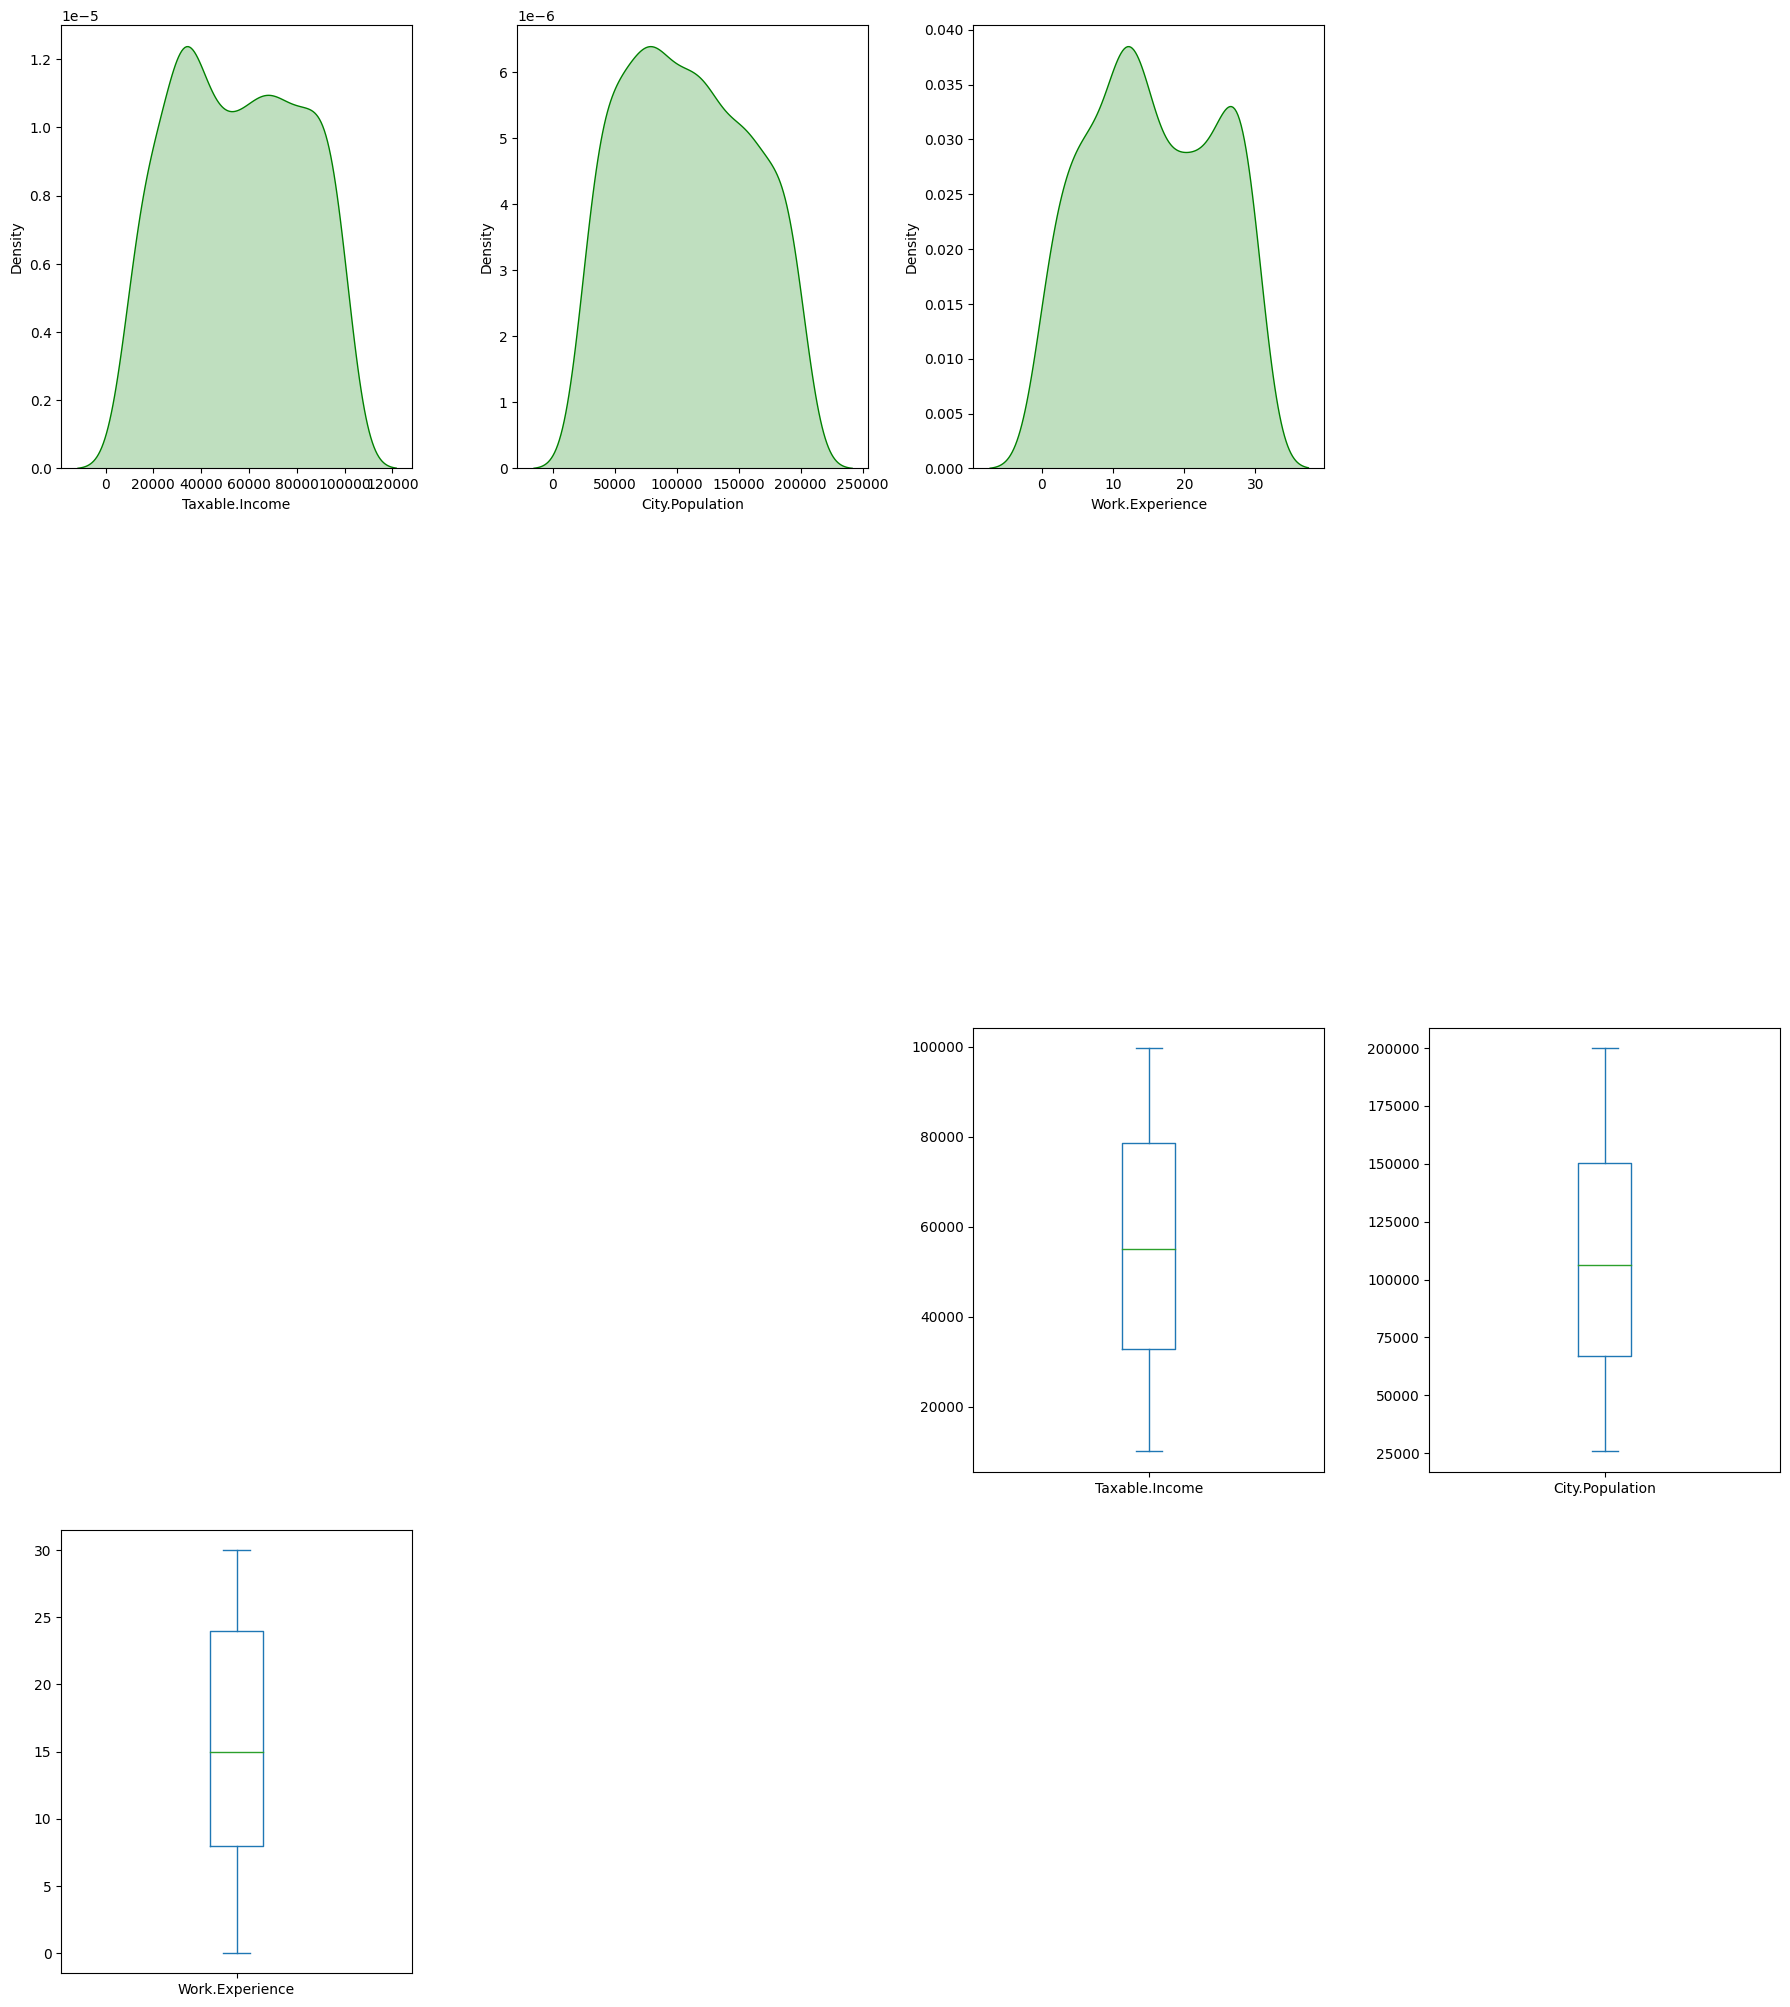

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [67]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [68]:
df1 = pd.get_dummies(df1, columns = ['Undergrad','Marital.Status','Urban'])

In [69]:
corr = df1.corr()

In [70]:
corr = df1.corr()

<AxesSubplot: >

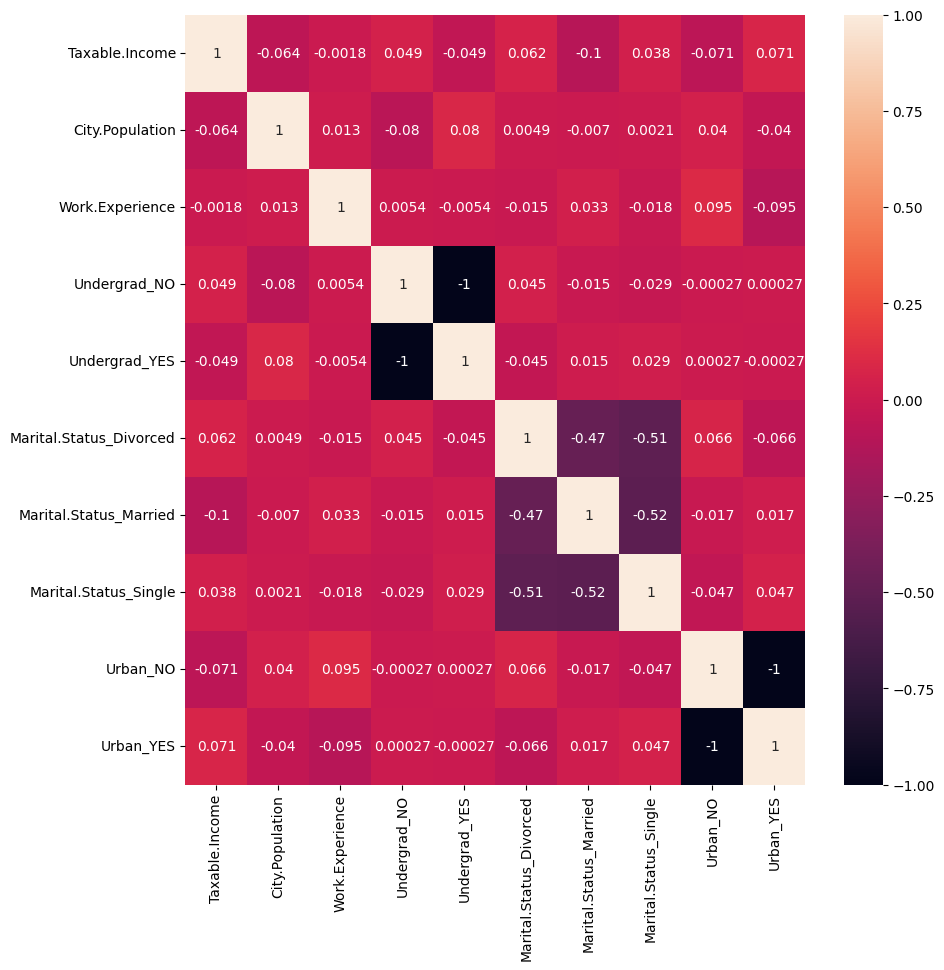

In [71]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# Random Forest Model
Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [72]:
df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [73]:
list(df1.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [74]:
X = df1.iloc[:,1:10]
y = df1.iloc[:,0]

In [83]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [84]:
y_train.value_counts()

good     380
risky    100
Name: Taxable.Income, dtype: int64

In [85]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.7375

In [86]:
pred_train = model.predict(x_train)

In [87]:
accuracy_score(y_train,pred_train)

1.0

In [88]:
confusion_matrix(y_train,pred_train)

array([[380,   0],
       [  0, 100]], dtype=int64)

In [89]:
pred_test = model.predict(x_test)

In [82]:
accuracy_score(y_test,pred_test)

0.7466666666666667

In [90]:
confusion_matrix(y_test,pred_test)

array([[85, 11],
       [23,  1]], dtype=int64)

In [91]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [92]:
df_t

,Actual,Predicted
368,good,good
340,good,good
207,risky,risky
374,good,good
28,risky,good
...,...,...
380,good,good
27,good,good
61,risky,good
537,good,good


# Conclusion
Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 74.66%

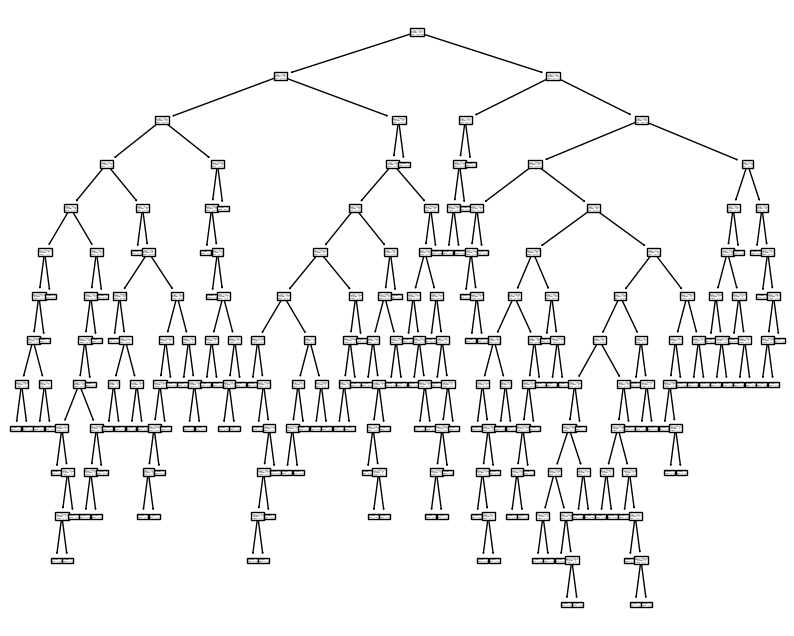

In [96]:
tree_idx = 1
fig, ax = plt.subplots(figsize=(10, 8)) 
plot_tree(model.estimators_[tree_idx], ax=ax)
plt.show()  

In [97]:
model.feature_importances_

array([0.51138589, 0.360617  , 0.0189396 , 0.01891868, 0.0183661 ,
       0.0202355 , 0.01819485, 0.01616437, 0.017178  ])

In [98]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [99]:
fi

,feature,importance
0,City.Population,0.511386
1,Work.Experience,0.360617
5,Marital.Status_Married,0.020236
2,Undergrad_NO,0.018940
3,Undergrad_YES,0.018919
4,Marital.Status_Divorced,0.018366
6,Marital.Status_Single,0.018195
8,Urban_YES,0.017178
7,Urban_NO,0.016164


As seen in the above table city population is most important feature

-------------------------------------